In [1]:
%matplotlib inline


# Template Matching

We use template matching to identify the occurrence of an image patch
(in this case, a sub-image centered on a single coin). Here, we
return a single match (the exact same coin), so the maximum value in the
``match_template`` result corresponds to the coin location. The other coins
look similar, and thus have local maxima; if you expect multiple matches, you
should use a proper peak-finding function.

The ``match_template`` function uses fast, normalized cross-correlation [1]_
to find instances of the template in the image. Note that the peaks in the
output of ``match_template`` correspond to the origin (i.e. top-left corner) of
the template.

.. [1] J. P. Lewis, "Fast Normalized Cross-Correlation", Industrial Light and
       Magic.


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

from skimage import data
from skimage.feature import match_template

In [17]:
image = imageio.imread(r'C:\Users\rb902100\Documents\JupyterAlPlay\backlit.png')
coin = image[1941:2120, 2141:2200]

#plt.imshow(image)

ax2.imshow(image, cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('image')
# highlight matched region
hcoin, wcoin = coin.shape
rect = plt.Rectangle((x, y), wcoin, hcoin, edgecolor='r', facecolor='none')
ax2.add_patch(rect)
plt.show()

ValueError: too many values to unpack (expected 2)

ValueError: too many values to unpack (expected 2)

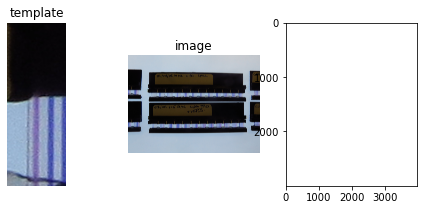

In [13]:
result = match_template(image, coin)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2)

ax1.imshow(coin, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(image, cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('image')
# highlight matched region
hcoin, wcoin = coin.shape
rect = plt.Rectangle((x, y), wcoin, hcoin, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('`match_template`\nresult')
# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

plt.show()